In [ ]:
from google.colab import files
import io
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from torchvision import datasets, transforms


In [1]:
t_F = ("/content/drive/MyDrive/Projects/Dragon_Fruit/Dataset/Train/Fresh")
t_W=("/content/drive/MyDrive/Projects/Dragon_Fruit/Dataset/Train/Wilting")
t_Wh=("/content/drive/MyDrive/Projects/Dragon_Fruit/Dataset/Train/White Spot")
t_R=("/content/drive/MyDrive/Projects/Dragon_Fruit/Dataset/Train/Red Spot")

In [ ]:
test_F=("/content/drive/MyDrive/Projects/Dragon_Fruit/Dataset/Test/Fresh")
test_W=("/content/drive/MyDrive/Projects/Dragon_Fruit/Dataset/Test/Wilting")
test_Wh=("/content/drive/MyDrive/Projects/Dragon_Fruit/Dataset/Test/White Spot")
test_R=("/content/drive/MyDrive/Projects/Dragon_Fruit/Dataset/Test/Red Spot")


In [ ]:
val_F=("/content/drive/MyDrive/Projects/Dragon_Fruit/Dataset/Validation/Fresh")
val_W=("/content/drive/MyDrive/Projects/Dragon_Fruit/Dataset/Validation/Wilting")
val_Wh=("/content/drive/MyDrive/Projects/Dragon_Fruit/Dataset/Validation/White Spot")
val_R=("/content/drive/MyDrive/Projects/Dragon_Fruit/Dataset/Validation/Red Spot")

In [ ]:
import os

In [ ]:
def t_files(folder_path):
    num_files=len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path,f))])
    return num_files

In [ ]:
print("F train_set",t_files(t_F))
print("W train_set",t_files(t_W))
print("Wh train_set",t_files(t_Wh))
print("R train_set",t_files(t_R))

print("F test_set",t_files(test_F))
print("W test_set",t_files(test_W))
print("Wh test_set",t_files(test_Wh))
print("R test_set",t_files(test_R))

print("F valid_set",t_files(val_F))
print("W valid_set",t_files(val_W))
print("Wh valid_set",t_files(val_Wh))
print("R valid_set",t_files(val_R))

F train_set 300
W train_set 348
Wh train_set 300
R train_set 300
F test_set 65
W test_set 60
Wh test_set 90
R test_set 50
F valid_set 65
W valid_set 60
Wh valid_set 93
R valid_set 54


In [ ]:
from PIL import Image
import IPython.display as display

image_path="/content/drive/MyDrive/Projects/Dragon_Fruit/Dataset/Train/Fresh/IMG_20240313_120824 - Copy.jpg"

with open(image_path,'rb') as f:
    display.display(display.Image(data=f.read(),width=500))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Projects/Dragon_Fruit/Dataset/Train',target_size=(225,225),batch_size=32,class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Projects/Dragon_Fruit/Dataset/Validation",
    target_size=(225,225),
    batch_size=32,
    class_mode="categorical"  # Adjust based on your data
)

Found 1248 images belonging to 4 classes.
Found 272 images belonging to 4 classes.


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

model=Sequential()
model.add(Conv2D(32,(3,3), input_shape=(225,225,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=25,
                    validation_data=validation_generator,
                    validation_batch_size=16)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 927s 20s/step - accuracy: 0.2976 - loss: 14.0427 - val_accuracy: 0.3897 - val_loss: 2.1467
Epoch 2/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 169s 4s/step - accuracy: 0.5396 - loss: 1.1134 - val_accuracy: 0.4816 - val_loss: 1.5255
Epoch 3/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 168s 4s/step - accuracy: 0.6621 - loss: 0.9257 - val_accuracy: 0.5662 - val_loss: 1.4428
Epoch 4/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 172s 4s/step - accuracy: 0.6946 - loss: 0.7912 - val_accuracy: 0.5772 - val_loss: 1.3332
Epoch 5/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - accuracy: 0.7121 - loss: 0.7337 - val_accuracy: 0.5515 - val_loss: 1.4215
Epoch 6/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 170s 4s/step - accuracy: 0.7350 - loss: 0.6968 - val_accuracy: 0.5551 - val_loss: 1.3962
Epoch 7/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 184s 3s/step - accuracy: 0.7344 - loss: 0.6740 - val_accuracy: 0.5331 - val_loss: 1.4466
Epoch 8/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 165s 4s/step - accuracy: 0.7792 - loss: 0.6382 - val_accuracy: 0.5882 - val_loss: 

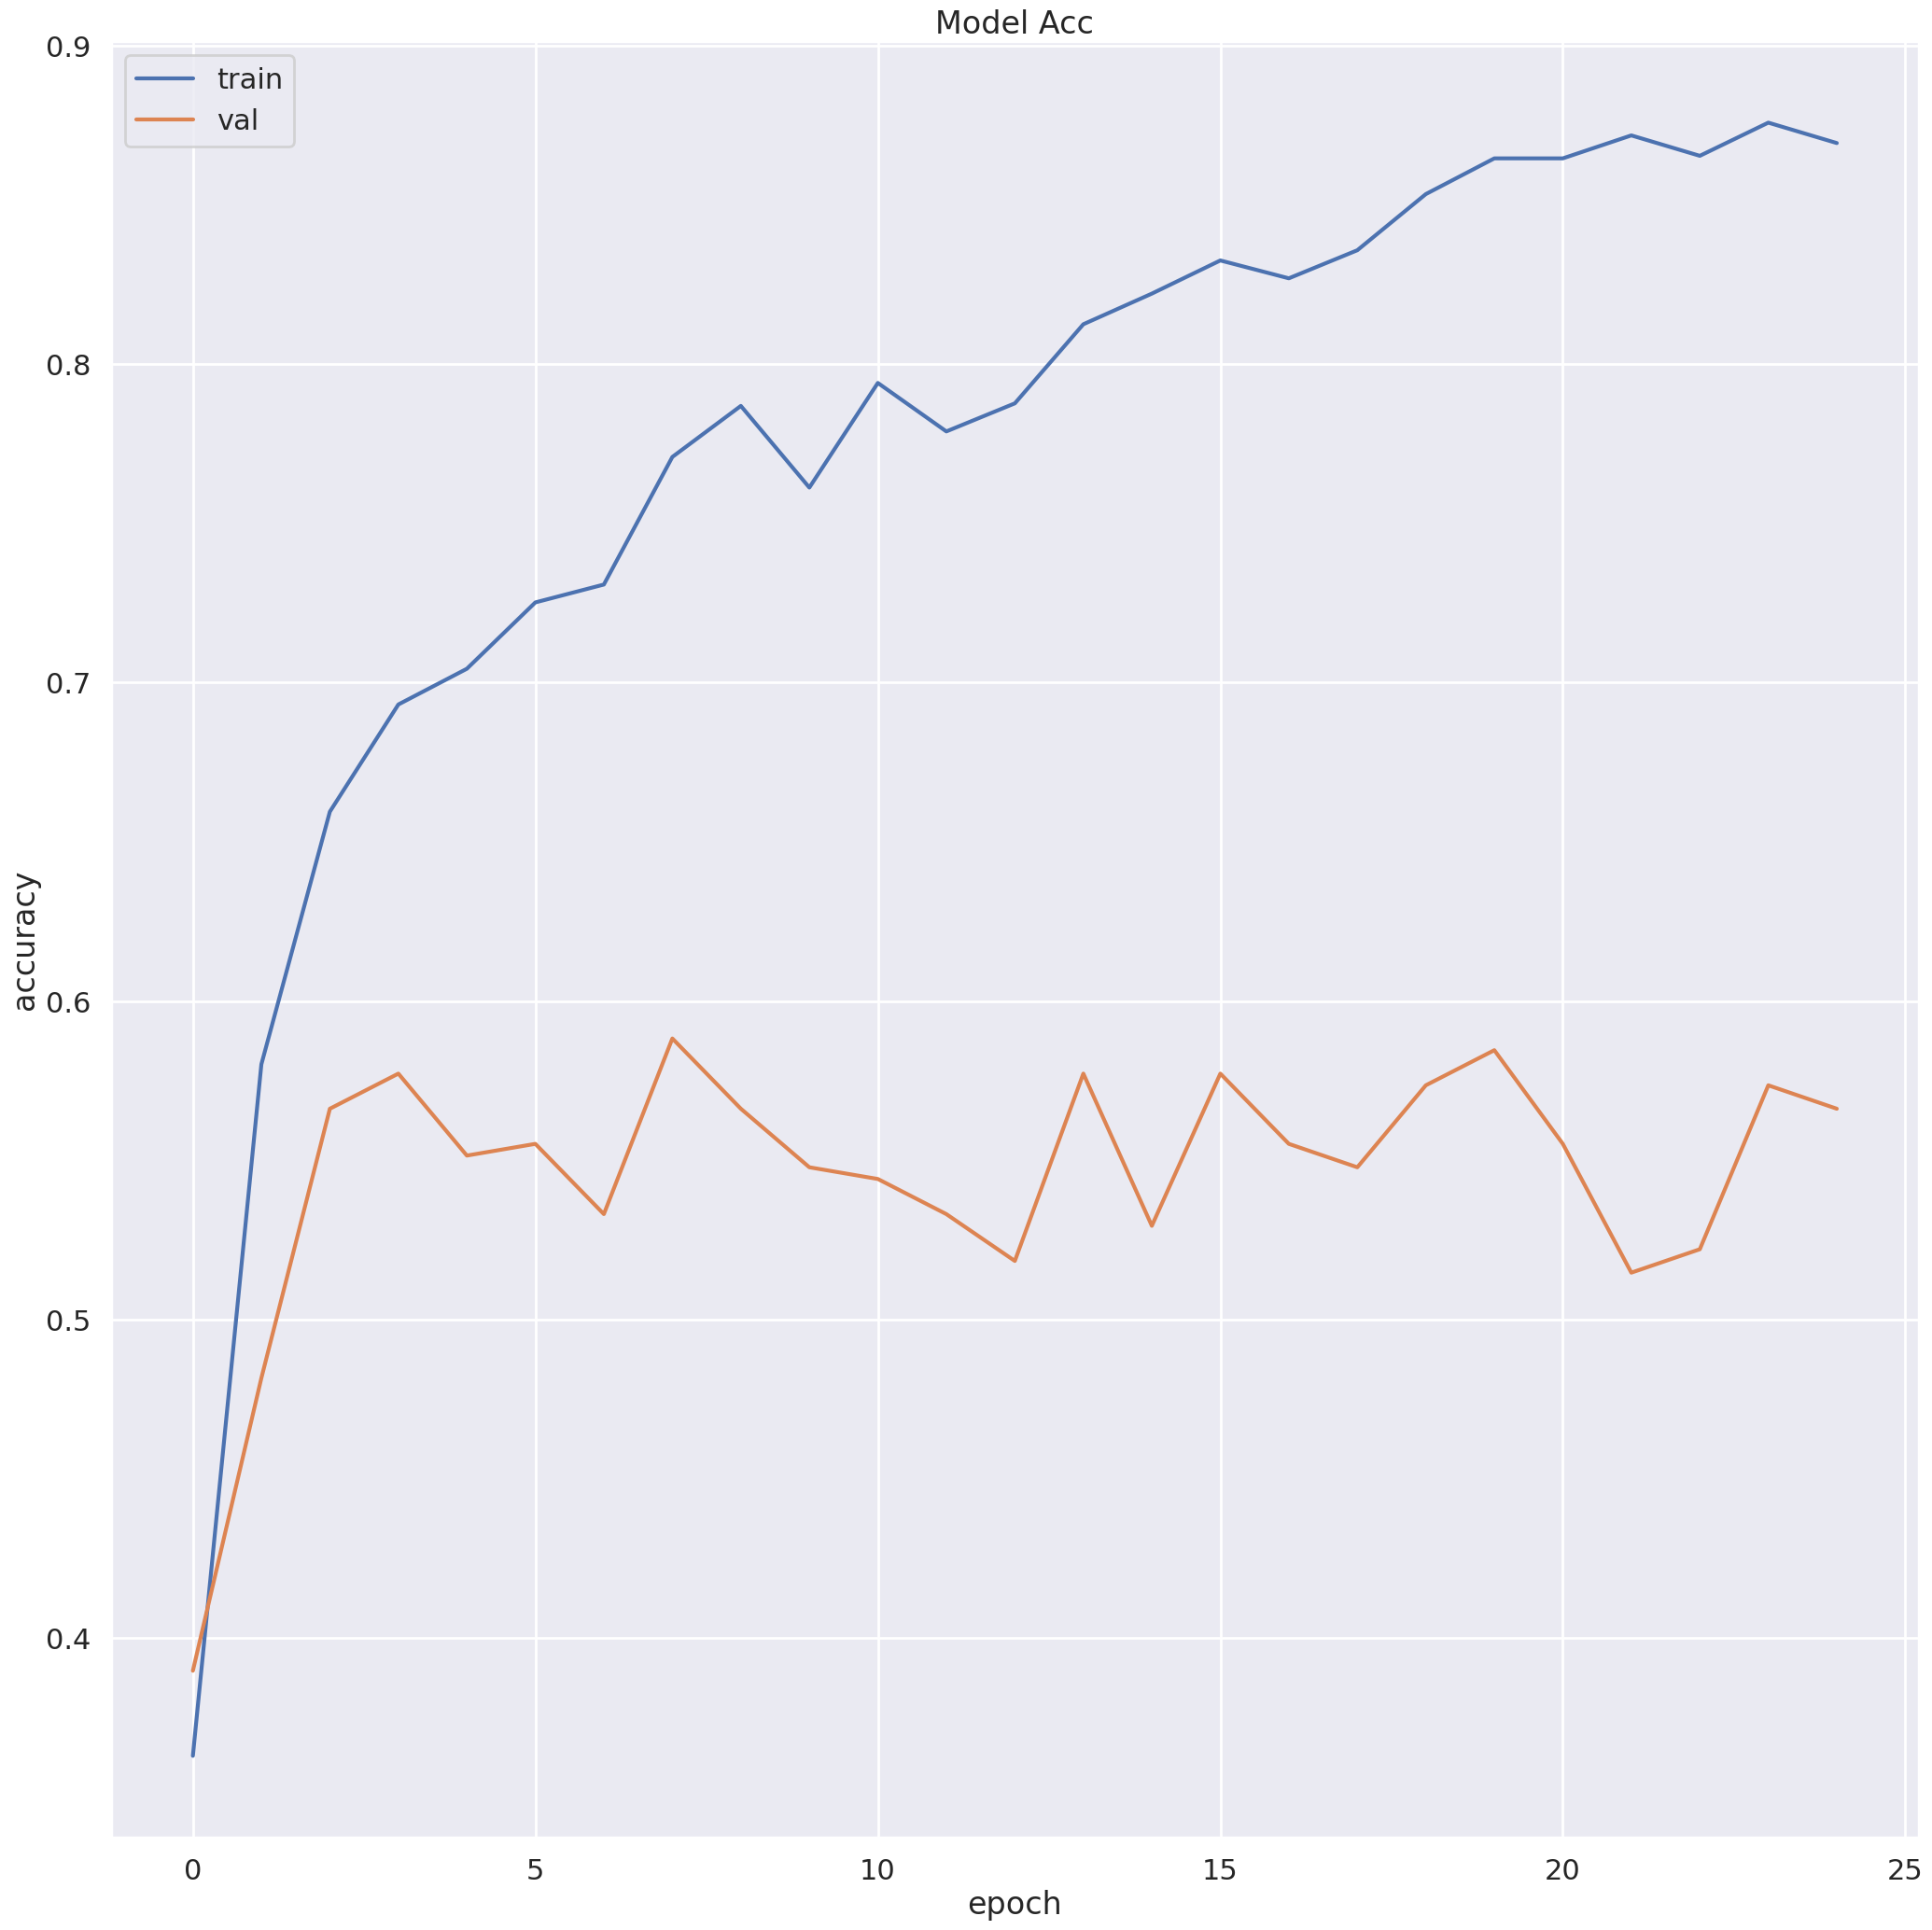

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25,25),dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Acc")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()



In [ ]:
#model.save("model_5.h5")

In [ ]:
#model.save("/content/drive/MyDrive/Plant/model.h5")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

import numpy as np

def preprocess_image(image_path,target_size=(225,225)):
  img = load_img(image_path,target_size=target_size)
  x= img_to_array(img)
  x=x.astype('float32') / 255.
  x=np.expand_dims(x,axis=0)
  return x

x= preprocess_image('/content/drive/MyDrive/Projects/Dragon_Fruit/Dataset/Test/Fresh/IMG_20240313_121750 - Copy.jpg')

In [ ]:
predictions=model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([0.12238979, 0.8270365 , 0.00172097, 0.04885278], dtype=float32)

In [ ]:
labels=train_generator.class_indices
labels={v:k for k,v in labels.items()}
labels

{0: 'Fresh', 1: 'Red Spot', 2: 'White Spot', 3: 'Wilting'}

In [ ]:
predicted_label=labels[np.argmax(predictions)]
print(predicted_label)

Red Spot
